# Capstone Webscrapping using BeautifulSoup

Web scraping is an automatic method to obtain large amounts of data from websites. In this Capstone, I will do web scraping exchange rate Indonesian Rupiah to American USD from https://www.exchange-rates.org/history/IDR/USD/T



<img src="assets/usd.jpg" width="600" height="300">


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [2]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content see what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [3]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/ht'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [4]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. In this scrapping, we get key table containing class table. Then we beautify the results we want to see using the `.prettify()`

In [5]:
table = soup.find('table', attrs={'class':'table'})
print(table.prettify()[1:500])

table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    4/8/2022
   </td>
   <td>
    Friday
   </td>
   <td>
    <a href="/Rate/USD/IDR/4-8-2022">
     14,361.23753
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/4-8-2022">
     USD IDR rate for 4/8/2022
    </a>
   </td>
  </tr>
  <tr>
   <td>
    4/7/2022
   </td>
   <td>
    Thursday
   </td>
   <td>
    <a href="/Rate/USD/IDR/4


Finding row length.

In [6]:
row = table.find_all('tr')
row_length = len(row)

Do the scrapping process to scrap the information. First we initialize a tuple and name it with the temp variable. Then we will make a loop from one to the length of the table row, which we will find all the cells of column one and two are date and kurs. then we will add it to the tuple we have created.

In [7]:
temp = [] #initiating a tuple

for i in range(1, row_length):

    # using key tr to take information
    row = table.find_all('tr')[i]
    
    # get date
    date = row.find_all('td')[0].text
    date = date.strip()
    
    # get kurs
    kurs = row.find_all('td')[2].text
    kurs = kurs.strip()
    
    temp.append((date,kurs))
    
    
temp 

[('4/7/2022', '14,376.17757 IDR'),
 ('4/6/2022', '14,353.48743 IDR'),
 ('4/5/2022', '14,429.30273 IDR'),
 ('4/4/2022', '14,461.93245 IDR'),
 ('4/1/2022', '14,387.12962 IDR'),
 ('3/31/2022', '14,453.05265 IDR'),
 ('3/30/2022', '14,336.99145 IDR'),
 ('3/29/2022', '14,361.15282 IDR'),
 ('3/28/2022', '14,357.41556 IDR'),
 ('3/25/2022', '14,336.41203 IDR'),
 ('3/24/2022', '14,344.22317 IDR'),
 ('3/23/2022', '14,342.49195 IDR'),
 ('3/22/2022', '14,316.28136 IDR'),
 ('3/21/2022', '14,334.33161 IDR'),
 ('3/18/2022', '14,317.32984 IDR'),
 ('3/17/2022', '14,201.08740 IDR'),
 ('3/16/2022', '14,287.09042 IDR'),
 ('3/15/2022', '14,327.65493 IDR'),
 ('3/14/2022', '14,369.24960 IDR'),
 ('3/11/2022', '14,298.14917 IDR'),
 ('3/10/2022', '14,272.77815 IDR'),
 ('3/9/2022', '14,220.21619 IDR'),
 ('3/8/2022', '14,404.96831 IDR'),
 ('3/7/2022', '14,415.73042 IDR'),
 ('3/4/2022', '14,441.31509 IDR'),
 ('3/3/2022', '14,372.46415 IDR'),
 ('3/2/2022', '14,343.65417 IDR'),
 ('3/1/2022', '14,315.13440 IDR'),
 ('2

it can be seen, that the results obtained start from the most recent date. We will change the order from oldest to newest date using `::-1`

In [8]:
temp = temp[::-1]
temp

[('10/11/2021', '14,220.90165 IDR'),
 ('10/12/2021', '14,214.84450 IDR'),
 ('10/13/2021', '14,204.85164 IDR'),
 ('10/14/2021', '14,105.27223 IDR'),
 ('10/15/2021', '14,070.19147 IDR'),
 ('10/18/2021', '14,056.43762 IDR'),
 ('10/19/2021', '14,075.46229 IDR'),
 ('10/20/2021', '14,079.51380 IDR'),
 ('10/21/2021', '14,121.60389 IDR'),
 ('10/22/2021', '14,110.21079 IDR'),
 ('10/25/2021', '14,152.60477 IDR'),
 ('10/26/2021', '14,166.19588 IDR'),
 ('10/27/2021', '14,141.55342 IDR'),
 ('10/28/2021', '14,175.29082 IDR'),
 ('10/29/2021', '14,288.95452 IDR'),
 ('11/1/2021', '14,233.76847 IDR'),
 ('11/2/2021', '14,256.29202 IDR'),
 ('11/3/2021', '14,256.74541 IDR'),
 ('11/4/2021', '14,334.06331 IDR'),
 ('11/5/2021', '14,338.39761 IDR'),
 ('11/8/2021', '14,257.97264 IDR'),
 ('11/9/2021', '14,243.01887 IDR'),
 ('11/10/2021', '14,271.96265 IDR'),
 ('11/11/2021', '14,288.84762 IDR'),
 ('11/12/2021', '14,233.63534 IDR'),
 ('11/15/2021', '14,235.75523 IDR'),
 ('11/16/2021', '14,222.37140 IDR'),
 ('11/17

## Creating data frame & Data wrangling

Put the array into dataframe

In [9]:
import pandas as pd

df = pd.DataFrame(temp,columns=['date','kurs'])
df.head()

,date,kurs
0,10/11/2021,"14,220.90165 IDR"
1,10/12/2021,"14,214.84450 IDR"
2,10/13/2021,"14,204.85164 IDR"
3,10/14/2021,"14,105.27223 IDR"
4,10/15/2021,"14,070.19147 IDR"


After that, we will remove the IDR string and the comma to change the kurs data type to float

In [10]:
# to get rid of the string 'IDR'
df['kurs'] = df['kurs'].str.replace('IDR','')

# to get rid of the string ','
df['kurs'] = df['kurs'].str.replace(',','')

df.head()

,date,kurs
0,10/11/2021,14220.90165
1,10/12/2021,14214.84450
2,10/13/2021,14204.85164
3,10/14/2021,14105.27223
4,10/15/2021,14070.19147


In [11]:
# check data types
df.dtypes

date    object
kurs    object
dtype: object

In [12]:
# to change the data type in columns date to datetime64
df['date'] = df['date'].astype('datetime64')

# to change the data type in columns kurs to float
df['kurs'] = df['kurs'].astype('float')

df.dtypes

date    datetime64[ns]
kurs           float64
dtype: object

we will create a new column containing month and year to get the mean so that it can be visualized by month category

In [13]:
# make new column to get contain month
df['month'] = df['date'].dt.to_period('M')
df.head()

,date,kurs,month
0,2021-10-11,14220.90165,2021-10
1,2021-10-12,14214.84450,2021-10
2,2021-10-13,14204.85164,2021-10
3,2021-10-14,14105.27223,2021-10
4,2021-10-15,14070.19147,2021-10


In [14]:
# using groupby to get mean in every month
df_mean = df.groupby('month').mean().round(2)
df_mean

,kurs
month,
2021-10,14145.59
2021-11,14270.15
2021-12,14315.45
2022-01,14337.25
2022-02,14362.52
2022-03,14337.79
2022-04,14401.61


after we get the average exchange rate from each month, then we will make a visualization using `.plot`

<AxesSubplot:xlabel='month'>

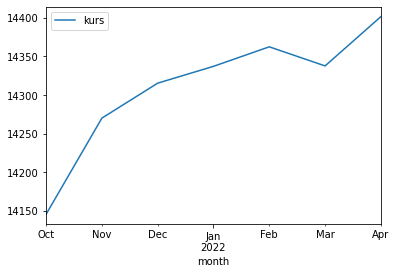

In [15]:
df_mean.plot()

## Conclusion

The chart illustrates that the dollar to rupiah exchange rate has an upward trend from October 2021-April 2022. Although in March 2022 there was a decline in the exchange rate, the exchange rate rose again in April 2022. The conclusion is the dollar exchange rate in October 2021. - April 2022 has increased.

The strengthening of the exchange rate of the dollar against the rupiah can have several negative impacts. The government must make efforts so that the value of the rupiah can strengthen again against the dollar exchange rate.